# 1.11 Narcissism, Perfectionism and A/B Testing

In [56]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

I keep some data frames in CSV format accessible from my website. One of them is called `personality.csv` and has, as you might imagine, personality variables. In this case, we are using a subset of the personality data with variables like perfectionsism, narcissism with grouping variables like biological sex and the `AccDate` variable which has Yes/No responses to the following question:

"At a time in your life when you are not involved with anyone, a person asks you out. This person has a great personality, but you do not find this person physically attractive. Do you accept the date?"

In [57]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.num_rows

148

In [58]:
pers.labels

('Sex', 'G21', 'Greek', 'AccDate', 'Stress1', 'Stress2', 'Perf', 'Narc')

In [59]:
pers

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8
F,N,N,N,10,7,123,1
F,N,N,N,16,18,93,4
F,N,Y,Y,12,12,126,7
F,N,N,Y,11,16,91,5
F,Y,N,Y,18,16,111,1


In [60]:
narc = pers.select('Sex','Narc')

The `nan` value indicates there is no value for that cell in the table. In this case, it's a survey item that went unanswered. The `numpy` function `nanmean` takes the average but ignores any `nan` values. In a clean table, we could just use `np.mean`, instead.

In [61]:
narc.group('Sex', np.average)

Sex,Narc average
F,3.81176
M,5.57143


In [62]:
a_mean = narc.group(0,np.average).column(1).item(0)
a_mean

3.8117647058823527

In [63]:
b_mean = narc.group(0,np.average).column(1).item(1)
b_mean

5.571428571428571

In [64]:
observed_difference = a_mean - b_mean
observed_difference

-1.7596638655462185

C:\Users\robbs\anaconda3\envs\datasci\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


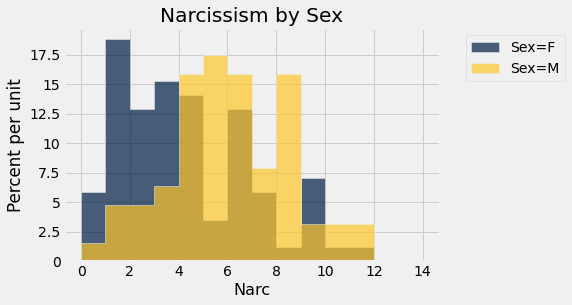

In [65]:
integer_bins = np.arange(15)
narc.hist('Narc', group = "Sex", bins = integer_bins)
_=plots.title('Narcissism by Sex')

## An A/B Test for differences in narcissism based on biological sex.

Notice that we simplify to the `narc` table which has only two columns, a grouping variable (Male/Female) and a numeric variable (narcissism score).

In [66]:
narc

Sex,Narc
F,3
F,2
F,4
F,2
F,8
F,1
F,4
F,7
F,5
F,1


## Let's shuffle the labels in the grouping variable column

In [67]:
shuffle_sex = narc.sample(with_replacement = False).column(0)
shuffle_sex

array(['F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F',
       'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M',
       'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'M',
       'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M',
       'M', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'M',
       'M', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M',
       'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F',
       'F', 'F', 'M', 'M', 'M'], dtype='<U1')

In [68]:
shuffled_narc = narc.with_column("Shuffled Grouping",shuffle_sex).select(2,1)
shuffled_narc

Shuffled Grouping,Narc
F,3
F,2
F,4
M,2
F,8
F,1
F,4
F,7
F,5
M,1


In [69]:
shuffled_narc.group('Shuffled Grouping',np.average)

Shuffled Grouping,Narc average
F,4.74118
M,4.31746


### Create a function that produces a random shuffle of the grouping variable column

We're copy-pasting the code from the previous 3-4 code blocks to make our function, and using the generic name `tab` for our data table.

In [70]:
def ab_shuffle(tab):
    shuffle_group = tab.sample(with_replacement = False).column(0)
    shuffled_tab = tab.with_column("Shuffled Grouping",shuffle_group).select(2,1)
    return shuffled_tab

ab_shuffle(narc)

Shuffled Grouping,Narc
M,3
F,2
F,4
F,2
M,8
M,1
F,4
F,7
F,5
F,1


### Function that calculates difference in means between shuffled A/B groups

From above, we were using the `.group` method to find our group means.

In [71]:
shuffled_narc.group('Shuffled Grouping',np.average)

Shuffled Grouping,Narc average
F,4.74118
M,4.31746


In [72]:
a_mean = shuffled_narc.group('Shuffled Grouping',np.average).column(1).item(0)
a_mean

4.741176470588235

In [73]:
b_mean = shuffled_narc.group('Shuffled Grouping',np.average).column(1).item(1)
b_mean

4.317460317460317

In [74]:
diff = a_mean - b_mean
diff

0.4237161531279181

We can see that we need to accept a generic two-column table where the grouping variable is listed first. Then we can use the above 3-4 to create our function.

In [75]:
def ab_diff(tab):
    tab.group(0,np.average)
    a_mean = tab.group(0,np.average).column(1).item(0)
    b_mean = tab.group(0,np.average).column(1).item(1)
    return a_mean - b_mean

ab_diff(shuffled_narc)

0.4237161531279181

### Run simulation 5,000 times

In [76]:
diffs = make_array()

reps = 5000

for i in range(reps):
    shuffled_tab = ab_shuffle(narc)
    new_diff = ab_diff(shuffled_tab)
    diffs = np.append(diffs, new_diff)
    
diffs

array([-0.54360411, -0.46069094, -0.10140056, ...,  0.06442577,
       -0.23958917,  0.20261438])

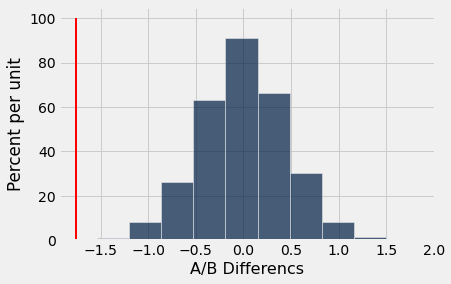

In [77]:
def ab_hist(myArray, obs_diff):
    tab = Table().with_column('A/B Differencs',myArray)
    tab.hist(0)
    _ = plots.plot([obs_diff, obs_diff], [0, 1], color='red', lw=2)

ab_hist(diffs,observed_difference)